##### 顯示 Matplotlib 圖表 ( 靜態圖表、圖表動畫 )
這篇教學會介紹如何運用 PyQt5 的 QGraphicsView，在 PyQt5 中顯示 Matplotlib 圖表，最後還會搭配 QTimer 實作圖表動畫 ( 不斷移動的正弦波形 )。

##### Matplotlib 顯示正弦波形 
參考「折線圖 Line Chart」教學範例，下方的程式碼執行後，就會產生 0～2 之間的正弦波形。

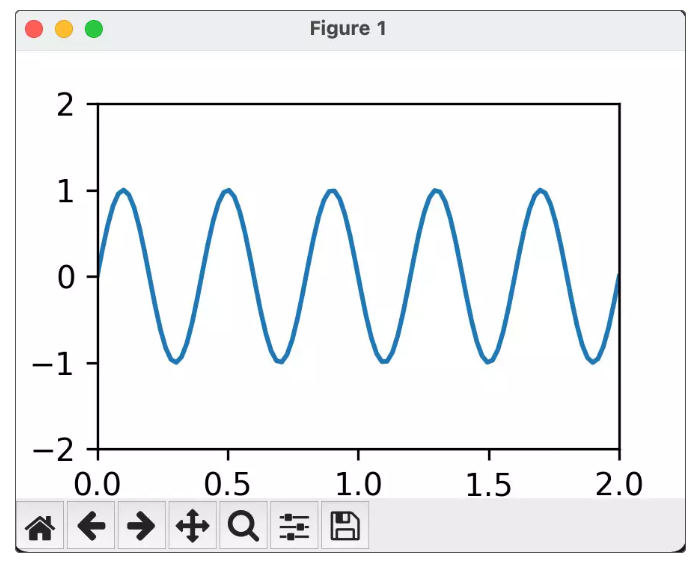

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3,2), dpi=150)
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [])
line.set_data([], [])
x = np.linspace(0, 2, 100)
y = np.sin(5 * np.pi * x)
line.set_data(x, y)

plt.show()

##### PyQt5 顯示 Matplotlib 圖表 
如果要在 PyQt5 中顯示 Matplotlib 圖表，需要額外載入 matplotlib.backends.backend_qt5agg 模組，並將 Matplotlib 設定為使用 Qt5Agg，\
接著就能透過 PyQt5 的 QGraphicsView 元件顯示圖表，下方的程式碼執行後，會開啟 PyQt5 視窗顯示 Matplotlib 圖表。

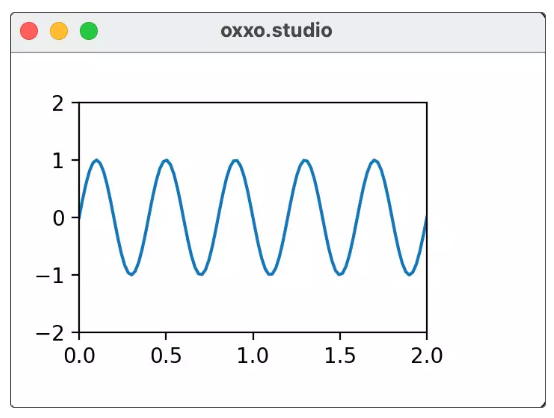

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Qt5Agg")  # 使用 Qt5
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys

# 建立正弦波繪圖函式
def sinWave(i=0):
    fig = plt.figure(figsize=(3,2), dpi=100)
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [])
    line.set_data([], [])
    x = np.linspace(0, 2, 100)
    y = np.sin(5 * np.pi * (x - 0.01*i))
    line.set_data(x, y)
    return fig

canvas = FigureCanvas(sinWave())  # 將圖表繪製在 FigureCanvas 裡

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(360, 240)

graphicview = QtWidgets.QGraphicsView(MainWindow)  # 建立顯示圖片元件
graphicview.setGeometry(0, 0, 360, 240)

graphicscene = QtWidgets.QGraphicsScene()   # 建立場景
graphicscene.setSceneRect(0, 0, 340, 220)
graphicscene.addWidget(canvas)              # 場景中放入圖表

graphicview.setScene(graphicscene)          # 元件中放入場景

MainWindow.show()
sys.exit(app.exec_())

##### PyQt5 顯示 Matplotlib 圖表動畫 
能夠顯示圖表後，就能再透過 QTimer 定時器功能，不斷改變圖表內容，就能實現圖表動畫的效果\
( 注意，繪製圖表時先加入 plt.close() 關閉已存在但不顯示的圖表，避免圖表數量到達上限 )。

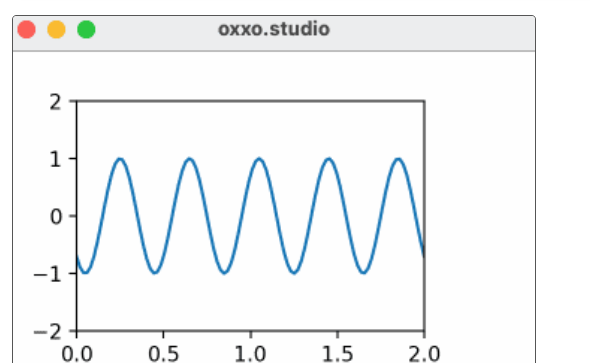

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
matplotlib.use("Qt5Agg")      # 表示使用 Qt5

from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys

def sinWave(i=0):
    plt.close()     # 執行時先刪除已有的 plt
    fig = plt.figure(figsize=(3,2), dpi=100)
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [])
    line.set_data([], [])
    x = np.linspace(0, 2, 100)
    y = np.sin(5 * np.pi * (x - 0.01*i))
    line.set_data(x, y)
    return fig

canvas = FigureCanvas(sinWave())

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(360, 240)

graphicview = QtWidgets.QGraphicsView(MainWindow)
graphicview.setGeometry(0, 0, 360, 240)

graphicscene = QtWidgets.QGraphicsScene()
graphicscene.setSceneRect(0, 0, 340, 220)
graphicscene.addWidget(canvas)

graphicview.setScene(graphicscene)

dx = 0   # x 位移初始值

def count():
    global dx, canvas
    dx = dx + 5                         # 每次定時器執行位移 5
    canvas = FigureCanvas(sinWave(dx))  # 產生新的正弦波圖形
    graphicscene.clear()                # 清空場景
    graphicscene.addWidget(canvas)      # 場景放入圖形

timer = QTimer()                        # 加入定時器
timer.timeout.connect(count)            # 設定定時要執行的 function
timer.start(50)                         # 啟用定時器，設定間隔時間為 500 毫秒

MainWindow.show()
sys.exit(app.exec_())

##### 使用 class 寫法 
同樣的結果也可以使用下方 class 的寫法：

In [ ]:
# 导入所需的 PyQt5 模块和 matplotlib 模块用于图形界面和绘图。
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys

import numpy as np  # 导入 NumPy 用于数据处理
import matplotlib  # 导入 matplotlib 用于绘图
matplotlib.use("Qt5Agg")  # 指定 matplotlib 的后端为 Qt5
import matplotlib.pyplot as plt  # 导入 pyplot 用于绘制图形

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas  # 导入 matplotlib 的 FigureCanvas 用于在 Qt5 中显示

# 定义 MyWidget 类，继承自 QtWidgets.QWidget，作为主窗口类。
class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()  # 初始化基类构造函数
        self.setWindowTitle('oxxo.studio')  # 设置窗口标题
        self.resize(360, 240)  # 设置窗口大小
        self.t = 0  # 初始化时间变量
        self.ui()  # 调用 UI 设置方法

    def ui(self):
        # 创建一个 matplotlib 图表的画布
        self.canvas = FigureCanvas(self.sinWave())

        # 创建一个 QGraphicsView，用于显示 QGraphicsScene
        self.graphicview = QtWidgets.QGraphicsView(self)
        self.graphicview.setGeometry(0, 0, 360, 240)  # 设置尺寸和位置

        # 创建一个 QGraphicsScene，用于容纳图形元素
        self.graphicscene = QtWidgets.QGraphicsScene()
        self.graphicscene.setSceneRect(0, 0, 340, 220)  # 设置场景的矩形区域
        self.graphicscene.addWidget(self.canvas)  # 将 canvas 添加到场景中

        # 设置 view 显示 scene
        self.graphicview.setScene(self.graphicscene)

    # 定义函数生成正弦波图形，接受一个参数 i 用于变化波形
    def sinWave(self, i=0):
        fig = plt.figure(figsize=(3,2), dpi=100)  # 创建一个新的 matplotlib 图形
        ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))  # 设置坐标轴范围
        line, = ax.plot([], [])  # 创建一个空的数据线
        x = np.linspace(0, 2, 100)  # 生成 x 值数组
        y = np.sin(5 * np.pi * (x - 0.01*i))  # 计算 y 值数组
        line.set_data(x, y)  # 更新线的数据
        plt.close()  # 关闭 plt，防止其显示
        return fig  # 返回创建的图形

    # 定义更新函数，用于定时更新图形
    def count(self):
        self.t = self.t + 5  # 增加时间变量
        self.canvas = FigureCanvas(self.sinWave(self.t))  # 创建新的画布
        self.graphicscene.clear()  # 清除场景中的所有元素
        self.graphicscene.addWidget(self.canvas)  # 将新的 canvas 添加到场景

# 应用程序入口点。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建应用程序对象
    Form = MyWidget()  # 创建 MyWidget 对象
    Form.show()  # 显示窗口

    timer = QTimer()  # 创建 QTimer 对象
    timer.timeout.connect(Form.count)  # 连接 timeout 信号到 count 方法
    timer.start(50)  # 设置定时器间隔为 50 毫秒，并启动定时器
    sys.exit(app.exec_())  # 启动事件循环